# Прогноз цены пальмового масла_ARMA, ARIMA, SARIMA, Holt-Winters_03.04.2024

## Содержание

* [Описание механизма работы моделей](#Механизм)
* [Импорт библиотек Python и загрузка набора данных](#Импорт)
* [Прогнозирование цены пальмового масла](#Прогнозирование)
    * [Подготовка данных](#Прогнозирование_подготовка)
    * [Прогнозирование с помощью модели ARMA](#ARMA)
        * [Обучение модели и построение прогноза на тестовых данных](#Обучение_ARMA)
        * [Построение прогноза на будущий период_1 месяц](#Прогноз_ARMA_1m)
    * [Прогнозирование с помощью модели ARIMA](#ARIMA)
        * [Обучение модели и построение прогноза на тестовых данных](#Обучение_ARIMA)
        * [Построение прогноза на будущий период_1 месяц](#Прогноз_ARMA_1m)
    * [Прогнозирование с помощью модели SARIMA](#SARIMA)
        * [Обучение модели и построение прогноза на тестовых данных](#Обучение_SARIMA)
        * [Построение прогноза на будущий период_1 месяц](#Прогноз_SARIMA_1m)
    * [Прогнозирование с помощью модели Хольта-Винтерса](#Хольт-Винтерс)
        * [Обучение модели и построение прогноза на тестовых данных](#Обучение_Хольт-Винтерс)
        * [Построение прогноза на будущий период 1 месяц](#Прогноз_Хольт-Винтерс_1m)
* [Выгрузка данных](#Выгрузка)
    * [Формирование точки данных прогноза и обновление истории прогнозов](#Выгрузка_точка)
    * [Выгрузка прогнозных значений](#Выгрузка_прогноз)
    * [Выгрузка параметров модели](#Выгрузка_параметры)

## Описание механизма работы моделей <a class = "anchor" if = "Механизм"></a>

Текущий файл - это рабочая версия моделей авторегрессионного скользящего среднего (**ARMA**, **ARIMA** и **SARIMA**) и экспоненциального сглаживания с сезонной составляющей(**модель Хольта-Винтерса**), используемые для прогнозирования цены пальмового масла.

Данный механизм характеризуется следующими параметрами:

1. Исходный набор данных, загружаемый в тетрадь Jupyter Notebook, включает в себя следующие параметры (в скобках указано название параметра в таблице данных):
    * Календарная дата (date)
    * **Соевое масло**_цена в Роттердаме, долл/т (Soybean oil_Rotterdam);
    * **Соевое масло**_цена в Бразилии, долл/т (Soybean oil_Brazil);
    * **Соевое масло**_цена в Аргентине, долл/т (Soybean oil_Argentina);
    * **Соевые бобы**_цена в Бразилии, долл/т (Soybean seed_Brazil);
    * **Рапсовое масло**_цена в Роттердаме, долл/т (Rapeseed oil_Rotterdam);
    * Курс рупий к доллару (Rupees/долл);
    * Курс юаня к доллару (Yuan/долл);
    * Курс евро к доллару (Euro/долл);
    * Курс рубля к доллару (Ruble/долл);
    * Курс ринггита к доллару (Ringgit/долл);
    * Цена нефти марки Brent, долл/т (Oil_Brent);
    * Цена нефти марки Urals. долл/т (Oil_Urals);
    * **Пальмовое масло**_цена сырого, долл/т (Palm oil_crude);
    * **Пальмовое масло**_цена очищенного, долл/т (Palm oil_RBD);
    * **Пальмовое масло**_цена в Аргентине, долл/т (Palm oil_Argentina);
    * Биодизельное топливо_цена в США, долл/т (Biodiesel_USA);
    * Среднесуточная температура в Куала-Лумпур, Малайзия, градусы C (mean_temp);
    * Среднесуточное давление в Куала-Лумпур, Малайзия, Па (mean_pres);
    * Среднесуточная влажность воздуха в Куала-Лумпур, Малайзия, % (mean_humid).


2. **Набор данных, используемый в машинном обучении и дальнейшем прогнозировании цены пальмового масла, включает в себя следующие параметры** (в скобках указано название параметра в таблице данных):
    * Календарная дата (date);
    * **Пальмовое масло**_цена очищенного, долл/т (po_price).
    
> где "po_price" новое название для исходного столбца "Palm oil_RBD" с учетом сохранения значений.
    
   
3. Прогнозируема целевая переменная - **Пальмовое масло_цена очищенного, долл/т (po_price)**.
4. Метод прогнозирования:
    * ARMA - модель авторегрессионного скользящего среднего, которая зависит от размера "окна" учета исторических значений для расчета среднего значения;
    * ARIMA - модель авторегрессионного скользящего среднего с учетом интегрирования значений;
    * SARIMA - модель авторегрессионного скользящего среднего с учетом интегрирования значений и введения сезонной составляющей.
    
    
5. Источники данных:
    * Ценовые показатели и курсы валют - **Информационный терминал Thomson Reuters Eikon**.

## Импорт библиотек Python и загрузка набора данных <a class = "anchor" id = "Импорт"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Импорт библиотек для работы с данными табличного вида, машинного обучения и визуализации данных;
2. Инициализация переменной для хранения импортируемого набора - **raw_data**;
3. Инициализация переменной и отбор в нее данных для дальнейшего машинного обучения и прогноза значений - **data**

> где **raw_data** подразумевает хранение "сырых" - первоначальных - данных;
**data** - хранит специально отобранные признаки (столбцы "date" и "palm oil_rbd").

In [7]:
# импорт библиотек для работы с данными
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date

# импорт библиотек для визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt

# импорт методов построения анализа 
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# импорт метрик оценки работы модели
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

C:\Users\k.storozhuk\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
# инициализация переменной и запись исходного набора данных
raw_data = pd.read_excel("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/datasets/dataset_po modeling.xlsx")
# проверка наличия всех полей в таблице
print('Список полей в загруженном наборе данных')
print(raw_data.columns.to_list())
print()
print('Количество строк в загруженном наборе:', raw_data.shape[0])

Список полей в загруженном наборе данных
['date', 'Soybean oil_Rotterdam', 'Soybean oil_Brazil', 'Soybean oil_Argentina', 'Soybean seed_Brazil', 'Rapeseed oil_Rotterdam', 'Rupees/$', 'Yuan/$', 'Euro/$', 'Ruble/$', 'Ringgit/$', 'Oil_Brent', 'Oil_Urals', 'Palm oil_crude', 'Palm oil_RBD', 'Palm oil_Argentina', 'Biodiesel_USA', 'mean_temp', 'mean_pres', 'mean_humid']

Количество строк в загруженном наборе: 4984


In [9]:
# отбираем набор данных для дальнейшего прогнозирования
data = raw_data[['date', 'Palm oil_RBD']]
# меняем заголовки
data = data.rename(
    columns = {
        'Palm oil_RBD' : 'po_price'
    })
# преобразуем значения в формате datetime к формату date и сформируем новый столбец индекса с использованием дат
data.index = pd.to_datetime(data['date'], format = '%Y-%m-%d')
# удалиим исходный столбец с датой
del data['date']
# визуализируем результат
print('Фрейм данных для анализа')
data.head()

Фрейм данных для анализа


,po_price
date,
2011-01-20,NaN
2011-01-21,1260.0
2011-01-22,1260.0
2011-01-23,1260.0
2011-01-24,1267.5


In [10]:
# отфильтровываем пустые значения
data = data.dropna()

In [11]:
# финальная проверка типов данных
data.dtypes

po_price    float64
dtype: object

In [12]:
# проверка набора по самой ранней дате
print('Самая ранняя дата в наборе', min(data.index))

Самая ранняя дата в наборе 2011-01-21 00:00:00


In [13]:
# обозначим значения индексов набора данных как даты
data = data.asfreq("D")

## Прогнозирование цены пальмового масла <a class = "anchor" id = "Прогнозирование"></a>

Данный блок содержит в себе несколько промежуточных этапов:

1. [Подготовка данных](#Прогнозирование_подготовка)
2. [Прогнозирование с помощью модели ARMA](#Прогнозирование_ARMA)
3. [Прогнозирование с помощью модели ARIMA](#Прогнозирование_ARIMA)
4. [Построение прогноза с помощью SARIMA](#Прогнозирование_SARIMA)

Каждый этап так же содержит в себе промежуточные подшаги. Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

### Подготовка данных <a class = "anchor" id = "Прогнозирование_подготовка"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **border_date** для хранения даты, которая послужит границей для дальнейшего разбиения общего набора данных на обучающую и тестовую выборки;
2. Инициализация переменных **y_train** и **y_test** для хранения вектора значений целевой переменной;
3. Вывод на экран значений переменных и количество значений, хранящихся в них.

In [18]:
# инициализируем дату-границу
border_date = pd.to_datetime(max(data.index.date) - timedelta(days = 20), format = '%Y-%m-%d')
print(border_date)

2024-08-22 00:00:00


In [19]:
# формируем обучающую выборку
y_train = data[data.index < border_date]
# формируем тестовую выборку
y_test = data[data.index >= border_date]
# проверяем значения выборок
print('Фрейм обучающей выборки')
display(y_train.tail())
print(f'Количество значений обучающей выборки {y_train.shape[0]}')
print()
print('Фрейм тестовой выборки')
display(y_test.head())
print(f'Количество значений в тестовой выборке {y_test.shape[0]}')

Фрейм обучающей выборки


,po_price
date,
2024-08-17,915.0
2024-08-18,915.0
2024-08-19,940.0
2024-08-20,932.5
2024-08-21,937.5


Количество значений обучающей выборки 4962

Фрейм тестовой выборки


,po_price
date,
2024-08-22,947.5
2024-08-23,955.0
2024-08-24,955.0
2024-08-25,955.0
2024-08-26,970.0


Количество значений в тестовой выборке 21


### Прогнозирование с помощью модели ARMA <a class = "anchor" id = "ARMA"></a>

#### Обучение модели и построение прогноза на тестовых данных <a class = "anchor" id = "Обучение_ARMA"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **ARMAmodel** для хранения объекта модели авторегрессионного скользящего среднего с определением соответствующих параметров;
2. Обучение модели ARMA на значениях обучающей выборки;
3. Получение прогнозных значений модели для промежутка тестовой выборки для последующего сравнения факта и прогноза;
4. Визуализация полученных значений и сравнение их с фактом;
5. Оценка качества модели путем расчета значений функций ошибок:
    * MAE - средняя абсолютная ошибка. Рассчитывается как сумма модулей отклонений, деленная на количество наблюдений;
    * MAPE - средняя абсолютная процентная ошибка. Рассчитывается как сумма модулей отклонений, деленных на фактические значения, которая делится на количество наблюдений и умножается на 100%;
    * RMSE - корень из среднеквадратической ошибки. Рассчитывается как извлечение квадратного корня из суммы возведенных в квадрат отклонений.

In [23]:
# принудительно отключим предупреждения системы
warnings.simplefilter(action = 'ignore', category = Warning)

# определяем параметры модели
ARMAmodel = SARIMAX(y_train['po_price'], order = (2, 1, 2))
# обучаем модель на соответствующих данных
ARMAmodel = ARMAmodel.fit()

In [24]:
# делаем прогнозы
y_arma = ARMAmodel.get_forecast(len(y_test))
y_t_pr_arma = y_arma.conf_int(alpha = 0.05)

# создаем отдельный столбец с предсказаниями в переменной y_pred_df
y_t_pr_arma['arma_values'] = ARMAmodel.predict(start = y_t_pr_arma.index[0], end = y_t_pr_arma.index[-1])
# формируем индексы для нового набора данных
y_t_pr_arma.index = y_test.index

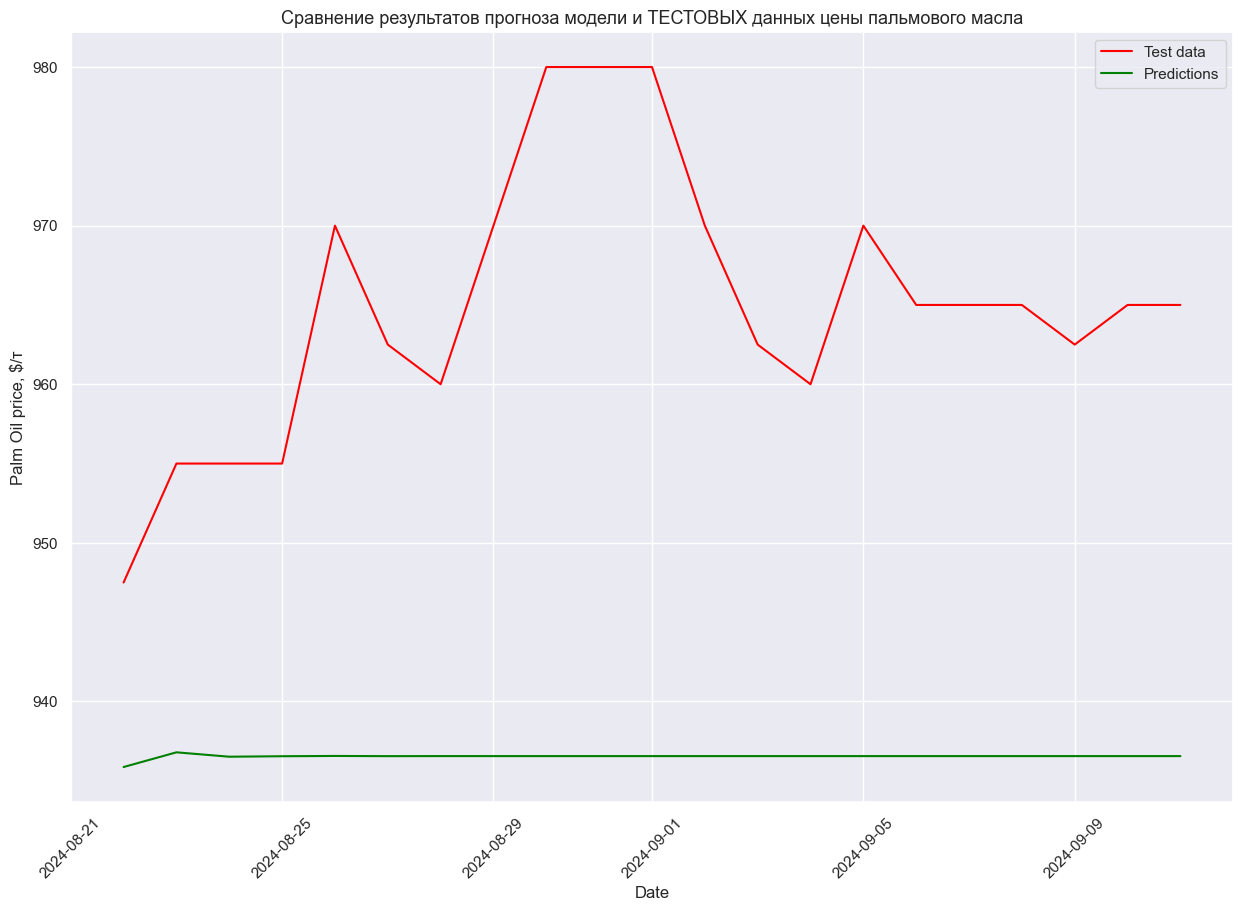

In [25]:
# визуализируем окно для тестовых данных и предсказаний
sns.set()
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'Test data')
plt.plot(y_t_pr_arma['arma_values'], color = 'green', label = 'Predictions')
plt.ylabel('Palm Oil price, $/т')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Сравнение результатов прогноза модели и ТЕСТОВЫХ данных цены пальмового масла', fontsize = 13)
plt.legend()
plt.show()

In [26]:
# оценим качество модели с помощью функций ошибок MAE, MAPE, RMSE
arma_mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values)
arma_mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values)
arma_rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values))

# выведем на экран значения ошибок
print('MAE:', arma_mae)
print('MAPE:', arma_mape)
print('RMSE:', arma_rmse)

MAE: 28.46681572908438
MAPE: 0.029427947518009336
RMSE: 29.63883902219048


#### Построение прогноза на будущий период_1 месяц <a class = "anchor" id = "Прогноз_ARMA_1m"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **end_1m**, с помощью которой формируется конечная граница прогноза;
2. Инициализация переменной **pred_arma_1m** для хранения прогнозных значений будущего периода и формирование индексов в формате "дата";
3. Вывод на экран результатов прогнозирования и экспорт значений в формате .CSV в хранилище на ПК.

In [29]:
# прогнозный период с конца имеющихся данных
start = len(data.index)

# формируем конечную точку прогноза (диапазон - 30 дней)
end_1m = len(data['po_price']) + 29

# формируем прогноз в формате DataFrame
pred_arma_1m = pd.DataFrame(data = round(ARMAmodel.predict(start, end_1m), 2),
                            index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1),
                                                                         format = '%Y-%m-%d'), freq = 'D', periods = 30))
# задаем названия столбцу индекса и столбцу значений
pred_arma_1m.index.name = "date"
pred_arma_1m = pred_arma_1m.rename(columns = {'predicted_mean': 'arma_values'})

### Прогнозирование с помощью модели ARIMA <a class = "anchor" id = "ARIMA"></a>

#### Обучение модели и построение прогноза на тестовых данных <a class = "anchor" id = "Обучение_ARIMA"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **ARIMAmodel** для хранения объекта модели авторегрессионного скользящего среднего с определением соответствующих параметров;
2. Обучение модели ARIMA на значениях обучающей выборки;
3. Получение прогнозных значений модели для промежутка тестовой выборки для последующего сравнения факта и прогноза;
4. Визуализация полученных значений и сравнение их с фактом;
5. Оценка качества модели путем расчета значений функций ошибок:
    * MAE - средняя абсолютная ошибка. Рассчитывается как сумма модулей отклонений, деленная на количество наблюдений;
    * MAPE - средняя абсолютная процентная ошибка. Рассчитывается как сумма модулей отклонений, деленных на фактические значения, которая делится на количество наблюдений и умножается на 100%;
    * RMSE - корень из среднеквадратической ошибки. Рассчитывается как извлечение квадратного корня из суммы возведенных в квадрат отклонений.

In [33]:
# определим модель ARIMA с параметрами порядка (3, 1, 0)
ARIMAmodel = ARIMA (y_train, order = (3, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

In [34]:
# делаем прогнозы
y_arima = ARIMAmodel.get_forecast(len(y_test.index))
y_t_pr_arima = y_arima.conf_int(alpha = 0.05)

# создаем отдельный столбец с предсказаниями в переменной y_pred_df
y_t_pr_arima['arima_values'] = ARIMAmodel.predict(start = y_t_pr_arima.index[0], end = y_t_pr_arima.index[-1])
# формируем индексы для нового набора данных
y_t_pr_arima.index = y_test.index

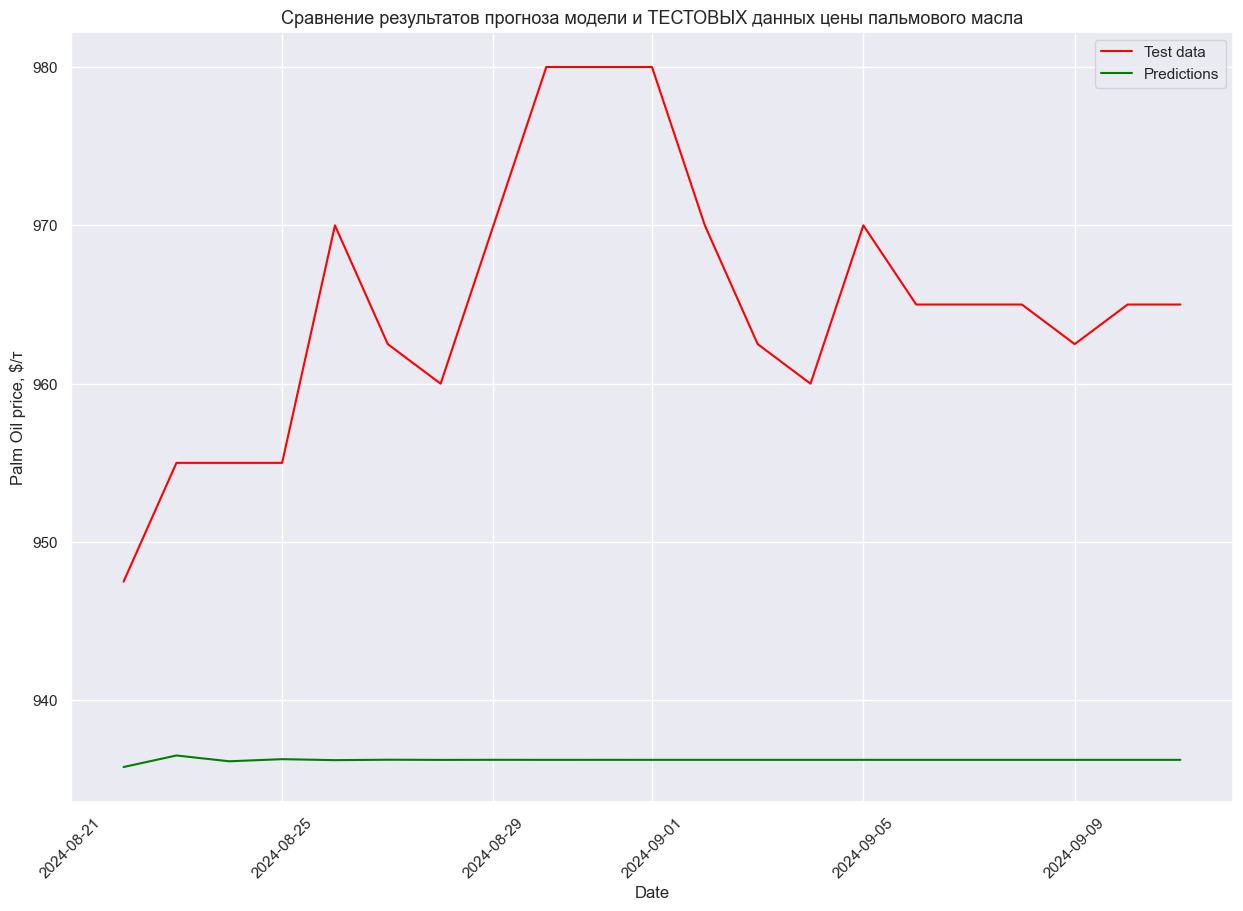

In [35]:
# визуализируем окно для тестовых данных и предсказаний
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'Test data')
plt.plot(y_t_pr_arima['arima_values'], color = 'green', label = 'Predictions')
plt.ylabel('Palm Oil price, $/т')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Сравнение результатов прогноза модели и ТЕСТОВЫХ данных цены пальмового масла', fontsize = 13)
plt.legend()
plt.show()

In [36]:
# оценим качество модели с помощью функций ошибок MAE, MAPE, RMSE
arima_mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values)
arima_mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values)
arima_rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values))

# выведем на экран значения ошибок
print('MAE:', arima_mae)
print('MAPE:', arima_mape)
print('RMSE:', arima_rmse)

MAE: 28.767554727437158
MAPE: 0.029739378017069173
RMSE: 29.934963520978393


#### Построение прогноза на будущий период_1 месяц <a class = "anchor" id = "Прогноз_ARMA_1m"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **pred_arima_1m** для хранения прогнозных значений будущего периода и формирование индексов в формате "дата";
2. Вывод на экран результатов прогнозирования и экспорт значений в формате .CSV в хранилище на ПК.

In [39]:
# формируем прогноз в формате DataFrame
pred_arima_1m = pd.DataFrame(data = round(ARIMAmodel.predict(start, end_1m), 2),
                              index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1), 
                                                                           format = '%Y-%m-%d'), freq = 'D', periods = 30))
# задаем названия столбцу индекса и столбцу значений
pred_arima_1m.index.name = "date"
pred_arima_1m = pred_arima_1m.rename(columns = {'predicted_mean': 'arima_values'})

### Прогнозирование с помощью модели SARIMA <a class = "anchor" id = "SARIMA"></a>

#### Обучение модели и построение прогноза на тестовых данных <a class = "anchor" id = "Обучение_SARIMA"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **SARIMAmodel** для хранения объекта модели авторегрессионного скользящего среднего с определением соответствующих параметров;
2. Обучение модели SARIMA на значениях обучающей выборки;
3. Получение прогнозных значений модели для промежутка тестовой выборки для последующего сравнения факта и прогноза;
4. Визуализация полученных значений и сравнение их с фактом;
5. Оценка качества модели путем расчета значений функций ошибок:
    * MAE - средняя абсолютная ошибка. Рассчитывается как сумма модулей отклонений, деленная на количество наблюдений;
    * MAPE - средняя абсолютная процентная ошибка. Рассчитывается как сумма модулей отклонений, деленных на фактические значения, которая делится на количество наблюдений и умножается на 100%;
    * RMSE - корень из среднеквадратической ошибки. Рассчитывается как извлечение квадратного корня из суммы возведенных в квадрат отклонений.

In [43]:
# определим модель SARIMA с параметрами порядка (2, 1, 0) и коэффициентами сезонности (2, 2, 0, 25)
SARIMAXmodel = SARIMAX(y_train, order = (2, 1, 0), seasonal_order = (2, 2, 0, 25))
SARIMAXmodel = SARIMAXmodel.fit()

In [44]:
# делаем прогнозы
y_sarima = SARIMAXmodel.get_forecast(len(y_test.index))
y_t_pr_sarima = y_sarima.conf_int(alpha = 0.05)

# создаем отдельный столбец с предсказаниями в переменной y_pred_df
y_t_pr_sarima['sarima_values'] = SARIMAXmodel.predict(start = y_t_pr_sarima.index[0], end = y_t_pr_sarima.index[-1])
# формируем индексы для нового набора данных
y_t_pr_sarima.index = y_test.index

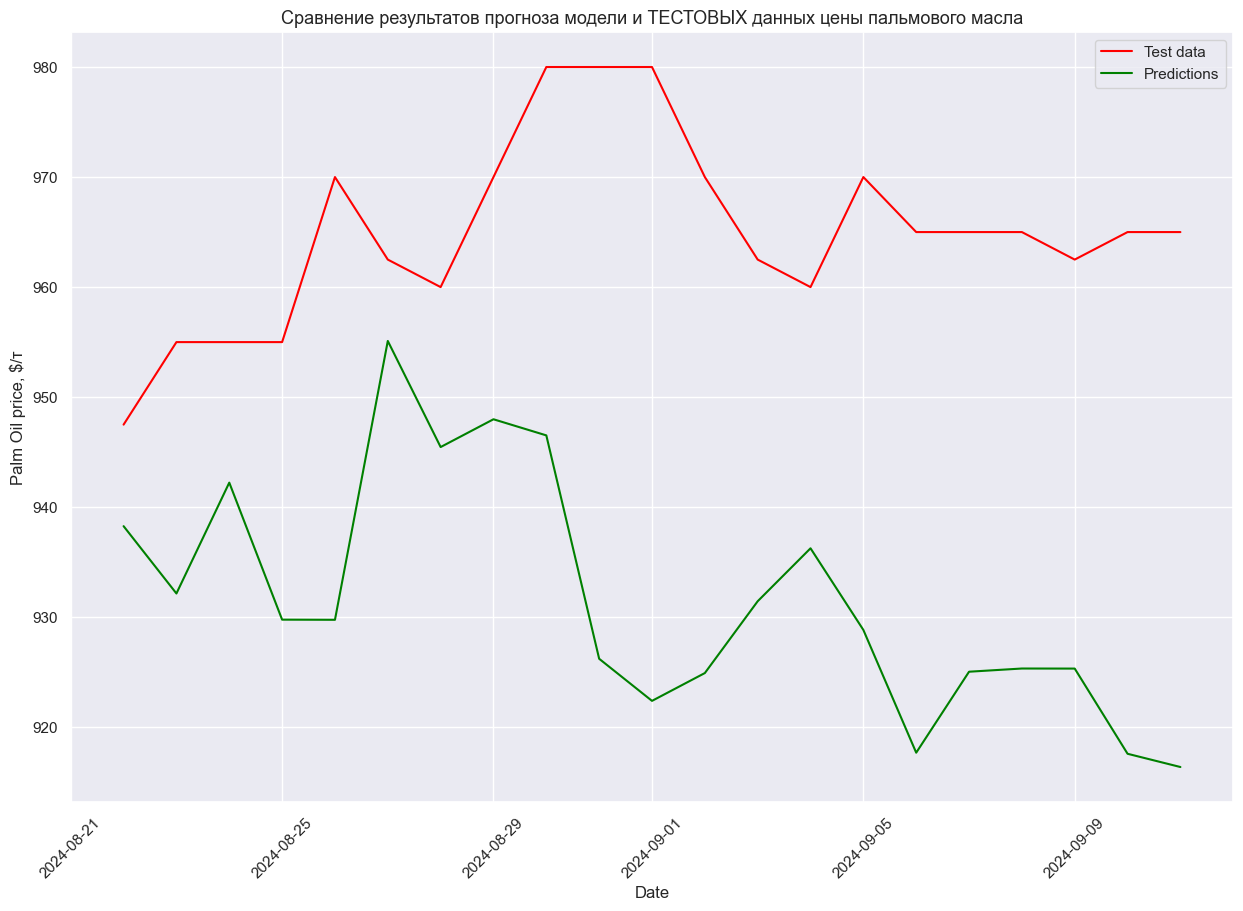

In [45]:
# визуализируем окно для тестовых данных и предсказаний
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'Test data')
plt.plot(y_t_pr_sarima['sarima_values'], color = 'green', label = 'Predictions')
plt.ylabel('Palm Oil price, $/т')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Сравнение результатов прогноза модели и ТЕСТОВЫХ данных цены пальмового масла', fontsize = 13)
plt.legend()
plt.show()

In [46]:
# оценим качество модели с помощью функций ошибок MAE, MAPE, RMSE
sarima_mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values)
sarima_mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values)
sarima_rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values))

# выведем на экран значения ошибок
print('MAE:', sarima_mae)
print('MAPE:', sarima_mape)
print('RMSE:', sarima_rmse)

MAE: 33.34649118945851
MAPE: 0.03446814372268281
RMSE: 36.35982465966761


#### Построение прогноза на будущий период_1 месяц <a class = "anchor" id = "Прогноз_SARIMA_1m"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **pred_sarima_1m** для хранения прогнозных значений будущего периода и формирование индексов в формате "дата";
2. Вывод на экран результатов прогнозирования и экспорт значений в формате .CSV в хранилище на ПК.

In [49]:
# формируем прогноз в формате DataFrame
pred_sarima_1m = pd.DataFrame(data = round(SARIMAXmodel.predict(start, end_1m), 2),
                              index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1),
                                                                           format = '%Y-%m-%d'), freq = 'D', periods = 30))

# задаем названия столбцу индекса и столбцу значений
pred_sarima_1m.index.name = "date"
pred_sarima_1m = pred_sarima_1m.rename(columns = {'predicted_mean': 'sarima_values'})

### Прогнозирование с помощью модели Хольта-Винтерса <a class = "anchor" id = "Хольт-Винтерс"></a>

#### Обучение модели и построение прогноза на тестовых данных <a class = "anchor" id = "Обучение_Хольт-Винтерс"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **HOLTWmodel** для хранения объекта модели Хольта-Винтерса с определением соответствующих параметров;
2. Обучение модели Хольта-Винтерса на значениях обучающей выборки;
3. Получение прогнозных значений модели для промежутка тестовой выборки для последующего сравнения факта и прогноза;
4. Визуализация полученных значений и сравнение их с фактом;
5. Оценка качества модели путем расчета значений функций ошибок:
    * MAE - средняя абсолютная ошибка. Рассчитывается как сумма модулей отклонений, деленная на количество наблюдений;
    * MAPE - средняя абсолютная процентная ошибка. Рассчитывается как сумма модулей отклонений, деленных на фактические значения, которая делится на количество наблюдений и умножается на 100%;
    * RMSE - корень из среднеквадратической ошибки. Рассчитывается как извлечение квадратного корня из суммы возведенных в квадрат отклонений.

In [53]:
# инициация переменной HOLTWmodel для хранения объекта модели
HOLTWmodel = ExponentialSmoothing(endog = y_train,
                                  trend = 'mul',
                                  seasonal = 'mul',
                                 seasonal_periods = 365).fit(optimized = True)

# инициация переменной pred_smoothing
y_t_pr_holtw = HOLTWmodel.forecast(len(y_test))

# формирование индексов для прогнозных значений
y_t_pr_holtw.index = y_test.index

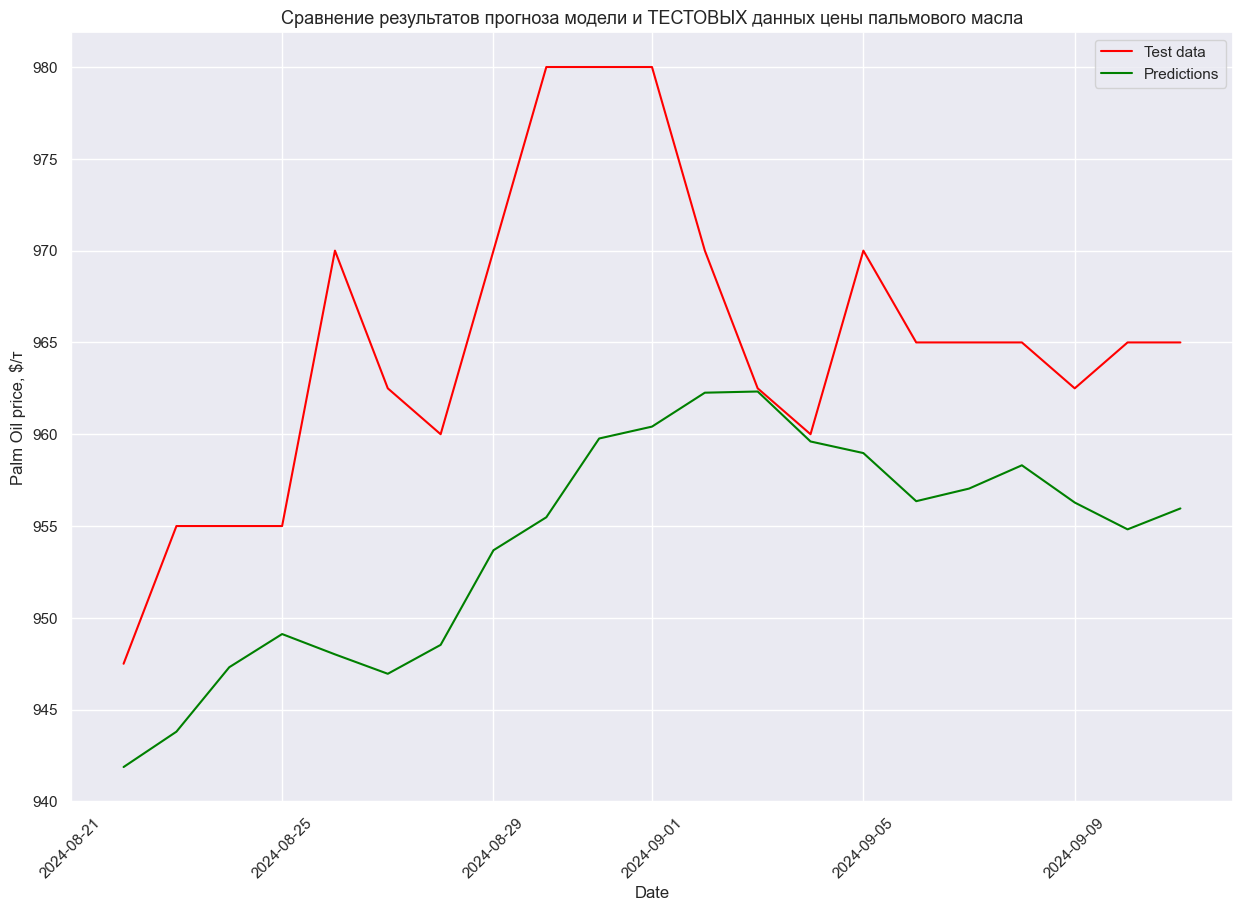

In [54]:
# визуализируем окно для тестовых данных и предсказаний
plt.figure(figsize = (15, 10))
plt.plot(y_test['po_price'], color = 'red', label = 'Test data')
plt.plot(y_t_pr_holtw, color = 'green', label = 'Predictions')
plt.ylabel('Palm Oil price, $/т')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.title('Сравнение результатов прогноза модели и ТЕСТОВЫХ данных цены пальмового масла', fontsize = 13)
plt.legend()
plt.show()

In [55]:
# оценим качество модели с помощью функций ошибок MAE, MAPE, RMSE
holtw_mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_holtw)
holtw_mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_holtw)
holtw_rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_holtw))

# выведем на экран значения ошибок
print('MAE:', holtw_mae)
print('MAPE:', holtw_mape)
print('RMSE:', holtw_rmse)

MAE: 10.863202339494364
MAPE: 0.01121788043464505
RMSE: 12.64279870234059


#### Построение прогноза на будущий период_1 месяц <a class = "anchor" id = "Прогноз_Хольт-Винтерс_1m"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **pred_holtw_1m** для хранения прогнозных значений будущего периода и формирование индексов в формате "дата";
2. Вывод на экран результатов прогнозирования и экспорт значений в формате .CSV в хранилище на ПК.

In [58]:
# заново обучим модель Хольта-Винтерса, но уже на целом наборе данных из-за математических особенностей работы модели
HOLTWmodel = ExponentialSmoothing(endog = data,
                                  trend = 'mul',
                                  seasonal = 'mul',
                                 seasonal_periods = 365).fit(optimized = True)


# формируем прогноз в формате DataFrame
pred_holtw_1m = pd.DataFrame(data = round(HOLTWmodel.predict(start, end_1m), 2),
                              index = pd.date_range(start = pd.to_datetime(max(data.index.date) + timedelta(days = 1),
                                                                           format = '%Y-%m-%d'), freq = 'D', periods = 30))

# задаем названия столбцу индекса и столбцу значений
pred_holtw_1m.index.name = "date"
pred_holtw_1m = pred_holtw_1m.rename(columns = {0: 'holtw_values'})

## Выгрузка данных <a class = "anchor" id = "Выгрузка"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Объявление функции **concat_data** для соединения значений по вертикали;
2. Формирование объединенных (тестовых и прогнозных значений) фреймов данных для каждой модели. Запись результатов в соответствующие переменные: **sarima_data, arima_data, arma_data**.
3. Объединение данных по моделям в один общий набор - инициализация переменной **full_data**.
4. Выгрузка результата в формате CSV на рабочий стол ПК.

### Формирование точки данных прогноза и обновление истории прогнозов <a class = 'anchor' id = 'Выгрузка_точка'></a>

In [62]:
# объединение прогнозов в один датафрейм
pred_point = pred_arma_1m.join(pred_arima_1m).join(pred_sarima_1m).join(pred_holtw_1m).head(10)

# импорт исторических значений
autoreg_history = pd.read_csv("~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/autoreg_history.csv")
#autoreg_history['date'] = pd.to_datetime(autoreg_history['date']).dt.date
autoreg_history = autoreg_history.set_index('date')

# добавление новой прогнозной точки в историю прогнозов
autoreg_history = pd.concat([autoreg_history, pred_point])

# сохранение обновленной истории на ПК
autoreg_history.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/autoreg_history.csv")

### Выгрузка прогнозных значений <a class = 'anchor' id = 'Выгрузка_прогноз'></a>

In [64]:
# объявление функции concat_data
def concat_data(test_data, predictions):
    frames = [test_data, predictions]
    return pd.concat(frames)

In [65]:
# применение функции и склейка тестовых данных и прогноза на 1 месяц
sarima_data = concat_data(pd.DataFrame(y_t_pr_sarima['sarima_values']), pred_sarima_1m)
arima_data = concat_data(pd.DataFrame(y_t_pr_arima['arima_values']), pred_arima_1m)
arma_data = concat_data(pd.DataFrame(y_t_pr_arma['arma_values']), pred_arma_1m)
holtw_data = concat_data(pd.DataFrame(y_t_pr_holtw).rename(columns = {0:'holtw_values'}), pred_holtw_1m)

In [66]:
# объединим фреймы данных в один общий набор
jn_sarima_arima = sarima_data.join(arima_data)
jn_sar_ari_arm = jn_sarima_arima.join(arma_data)
full_data = jn_sar_ari_arm.join(holtw_data)

full_data = full_data.rename(columns = {
    'sarima_values':'sarima_1m',
    'arima_values':'arima_1m',
    'arma_values':'arma_1m',
    'holtw_values':'holtw_1m'
})

In [67]:
# выгрузка данных на рабочий стол ПК
full_data.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/data reports_from jupyter/autoregression_models_predictions.csv")

### Выгрузка параметров модели <a class = 'anchor' id = 'Выгрузка_параметры'></a>

In [69]:
# формирование новой точки - текущие параметры модели ARMA - в формате DataFrame
arma_point = pd.DataFrame(ARMAmodel.params).T

# добавление значений текущей даты и значений функций ошибок
arma_point = arma_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values),
    rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values)),
    mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_arma['arma_values'].values))

# загрузка набора данных, содержащего исторические значения параметров модели
arma_params = pd.read_csv('~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/arma_params.csv')
arma_params['date'] = pd.to_datetime(arma_params['date']).dt.date
arma_params = arma_params.set_index('date')

# добавления в набор данных новой точки с обновленными параметрами модели
arma_params = pd.concat([arma_params, arma_point])

# сохранение набора на ПК
arma_params.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/arma_params.csv")

In [70]:
# формирование новой точки - текущие параметры модели ARIMA - в формате DataFrame
arima_point = pd.DataFrame(ARIMAmodel.params).T

# добавление значений текущей даты и значений функций ошибок
arima_point = arima_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values),
    rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values)),
    mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_arima['arima_values'].values))

# загрузка набора данных, содержащего исторические значения параметров модели
arima_params = pd.read_csv('~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/arima_params.csv')
arima_params['date'] = pd.to_datetime(arima_params['date']).dt.date
arima_params = arima_params.set_index('date')

# добавление в набор данных новой точки с обновленными параметрами модели
arima_params = pd.concat([arima_params, arima_point])

# сохранение набора на ПК
arima_params.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/arima_params.csv")

In [71]:
# формирование новой точки - текущие параметры модели SARIMA - в формате DataFrame
sarima_point = pd.DataFrame(SARIMAXmodel.params).T

# добавление значений текущей даты и значений функций ошибок
sarima_point = sarima_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values),
    rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values)),
    mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_sarima['sarima_values'].values))

# загрузка набора данных, содержащего исторические значения параметров модели
sarima_params = pd.read_csv('~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sarima_params.csv')
sarima_params['date'] = pd.to_datetime(sarima_params['date']).dt.date
sarima_params = sarima_params.set_index('date')

# добавление в набор данных новой точки с обновленными параметрами модели
sarima_params = pd.concat([sarima_params, sarima_point])

# сохранение набора на ПК
sarima_params.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sarima_params.csv")

In [72]:
# формирование новой точки - текущие параметры модели Holt-Winters - в формате DataFrame
HoltW_point = HOLTWmodel.params_formatted.iloc[:5]

HoltW_point = HoltW_point[['param']].T.reset_index().drop('index', axis = 1)

# добавление значений текущей даты и значений функций ошибок
HoltW_point = HoltW_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_test['po_price'].values, y_t_pr_holtw),
    rmse = np.sqrt(mean_squared_error(y_test['po_price'].values, y_t_pr_holtw)),
    mape = mean_absolute_percentage_error(y_test['po_price'].values, y_t_pr_holtw))

# загрузка набора данных, содержащего исторические значения параметров модели
HoltW_params = pd.read_csv('~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/HolTW_params.csv')
HoltW_params['date'] = pd.to_datetime(HoltW_params['date']).dt.date
HoltW_params = HoltW_params.set_index('date')

# добавление в набор данных новой точки с обновленными параметрами модели
HoltW_params = pd.concat([HoltW_params, HoltW_point])

# сохранение набора на ПК
HoltW_params.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/HolTW_params.csv")